# Homework 0

**Name:** Oscar Eduardo Arámbula Vega

**e-mail:** oscar.arambula4388@alumnos.udg.mx

# MODULES

In [1]:
# Load modules
from typing import Callable
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt

# Theory on the Gradient Descent algorithm

## Function to be optimized
I chose to optimize the `Eason` function.

$
f(x,y) = -cos(x)cos(y)e^{-(x-\pi)^2-(y-\pi)^2}
$

The gradient of the Eason function the following which I extracted from the following [source](https://www.mdrk.io/interesting-functions-to-optimize/).

$
\nabla f(x,y) = \begin{bmatrix}
sin(x)cos(y)e^{-(x-\pi)^2-(y-\pi)^2} + 2(x-\pi)cos(x)cos(y)e^{-(x-\pi)^2-(y-\pi)^2} \\
cos(x)sin(y)e^{-(x-\pi)^2-(y-\pi)^2} + 2(y-\pi)cos(x)cos(y)e^{-(x-\pi)^2-(y-\pi)^2}
\end{bmatrix}
$

This could be simplified by extracting common factors to:

$
\nabla f(x,y) = \begin{bmatrix}
cos(y)e^{-(x-\pi)^2-(y-\pi)^2}[sin(x)+ 2(x - \pi)cos(x)] \\
cos(x)e^{-(x-\pi)^2-(y-\pi)^2}[sin(y)+ 2(x - \pi)cos(y)]
\end{bmatrix}
$

And, the global minimum of the function is at the point $(\pi, \pi)$ where the function has a value of $-1$.

In [8]:
# Function to be optimized
def easom[O: float|npt.ArrayLike[np.float64]](x: O, y: O) -> O:
    return -np.cos(x) * np.cos(y) * np.exp(- (x - np.pi) ** 2 - (y - np.pi) ** 2)

def easom_gradient(x: float, y: float) -> npt.NDArray[float]:
    grad_x = np.cos(y) * np.exp(- (x - np.pi) ** 2 - (y - np.pi) ** 2) * (np.sin(x) + 2 * (x - np.pi) * np.cos(x))
    grad_y = np.cos(x) * np.exp(- (x - np.pi) ** 2 - (y - np.pi) ** 2) * (np.sin(y) + 2 * (y - np.pi) * np.cos(y))
    return np.array([grad_x, grad_y])

## Gradient Descent Algorithm

I implemented the _Stochoastic Gradient Descent_ algorithm using an iterative approach. The algorithm is as follows:

$
w := w - \eta \nabla Q_i(w).
$

Where:
- $w$ is the current point.
- $\eta$ is the learning rate.
- $\nabla Q_i(w)$ is the gradient of the function at the current point.
- $Q_i(w)$ is the function to be optimized.
- $i$ is the iteration number.

The pseudocode for the algorithm is as follows:
1. Choose a starting point $w$.
2. Repeat until the tolerance is reached or the maximum number of iterations is reached:
    1. $w := w - \eta \nabla Q_i(w).$

For the implementation, I make a function that can receive any function that is the gradient of the function to be optimized.
In every iteration, I record the current point and the gradient of the function at that point, so the function will return
the steps at the end.

I used the following resource to get to work the algorithm:
   * [Wikipedia, Stochastic Gradient Descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)
   * [Real Python, Stochastic Gradient Descent Algorithm With Python and NumPy](https://realpython.com/gradient-descent-algorithm-python/)

In [118]:
# Implementation of the gradient descent algorithm
def gradient_descent(
    gradient: Callable[..., npt.NDArray[float]],
    start: npt.NDArray[float],
    learning_rate: float,
    max_iterations: int = 1000,
    tolerance: float = 1e-06,
) -> npt.NDArray[npt.NDArray[float]]:
    steps = [start]

    current = start
    for i in range(max_iterations):
        diff = - gradient(*current) * learning_rate

        if np.all(np.abs(diff) <= tolerance):
            break

        current = current + diff
        steps.append(current)

    return np.array(steps)

## Finding the minimum of the Eason function

To test the gradient descent algorithm to find the minimun of the `Eason` function,
I will start the algorithm at the point `[1.4, 4.3]` which is a point from where the
algorithm coverges to the global minimumand use a learning rate of `0.5`. I will set
the maximum number of iterations to `1000` and the tolerance to `1e-06`.

In [134]:
# Run gradient descent algorithm
path = gradient_descent(
    gradient=easom_gradient,
    start=np.array([1.4, 4.3]), # [1.4, 4.3] is a good starting point
    learning_rate=0.5,
    max_iterations=1000,
    tolerance=1e-06,
)

# Print the final point and number of steps
print(f"Final point: {path[-1]}")
print(f"Number of steps: {len(path) - 1}")

Final point: [3.14159209 3.14159316]
Number of steps: 208


The plot the function and the path that the algorithm took to find the minimum.

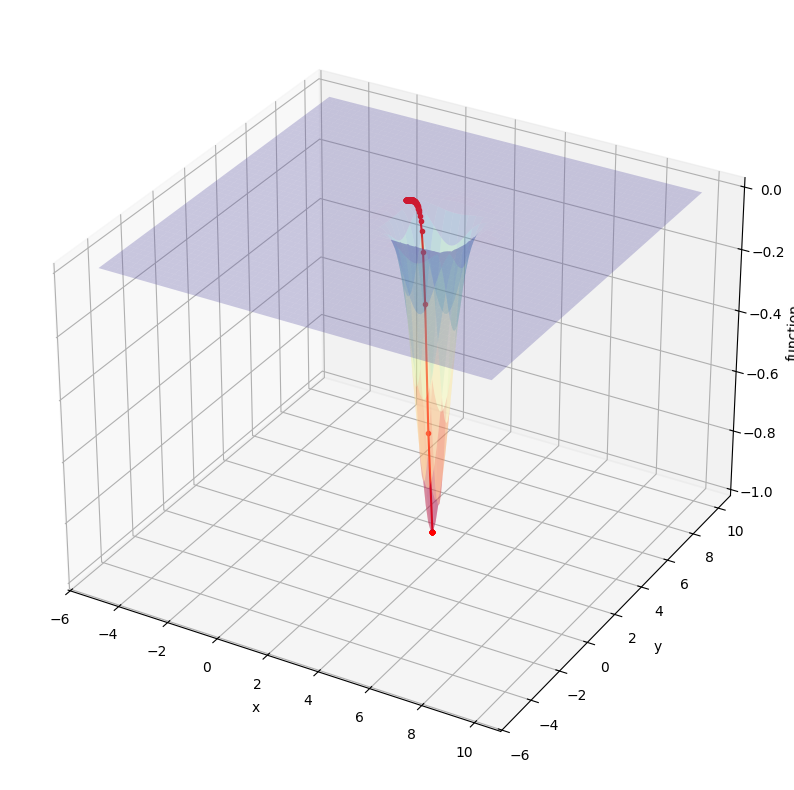

In [135]:
# Define a meshgrid for plotting the function
def plot(
    x_range: npt.NDArray,
    y_range: npt.NDArray,
    function: Callable[[npt.NDArray, npt.NDArray], npt.NDArray],
    path: npt.NDArray,
) -> None:
    X, Y = np.meshgrid(x_range, y_range)
    Z = function(X,Y)

    # Plot the results
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='Spectral', alpha=0.3)

    # ax.scatter(0,0,0, c='r', marker='o')
    ax.plot(path[:, 0], path[:, 1], easom(path[:, 0], path[:, 1]), c='r', marker='o', markersize=3)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('function')
    plt.show()

plot(
    x_range=np.arange(-5, 10, 0.1),
    y_range=np.arange(-5, 10, 0.1),
    function=easom,
    path=path,
)

In the next plot, I just zoom in the area where the minimum of the function is located.

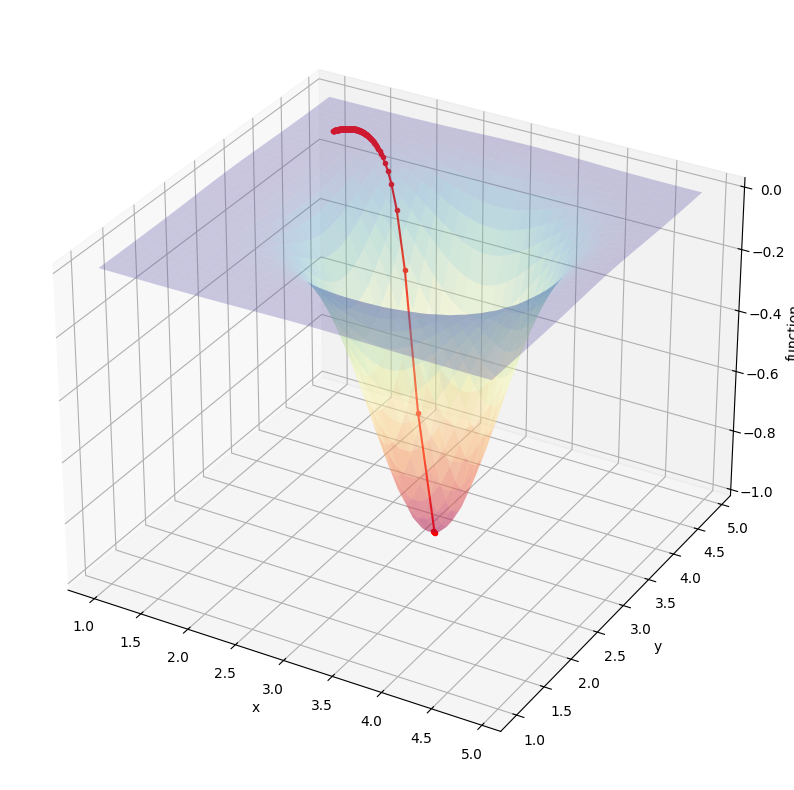

In [136]:
plot(
    x_range=np.arange(1, 5, 0.1),
    y_range=np.arange(1, 5, 0.1),
    function=easom,
    path=path,
)

## Throbleshooting

I faced a problem with the algorithm. I chose a random point, ignoring that the `easom` function
has a global minimum at the point $(\pi, \pi)$. So, once I ran the algorithm, I noticed that
instead of approaching the global minimum, the algorithm was diverging. I tried to change the
learning rate and tolerance without success.

The next code, I just reduced my starting point to `[1.3, 4.3]`.

In [137]:
# Run gradient descent algorithm
path = gradient_descent(
    gradient=easom_gradient,
    start=np.array([1.3, 4.3]), # [1.4, 4.3] was the starting point I used before
    learning_rate=0.5,
    max_iterations=1000,
    tolerance=1e-06,
)

# Print the final point and number of steps
print(f"Final point: {path[-1]}")
print(f"Number of steps: {len(path) - 1}")

Final point: [1.29538288 4.83858043]
Number of steps: 1000


And the results as we can see are going away from the global minimum. If we plot the function
and the path, we can see that the path is diverging.

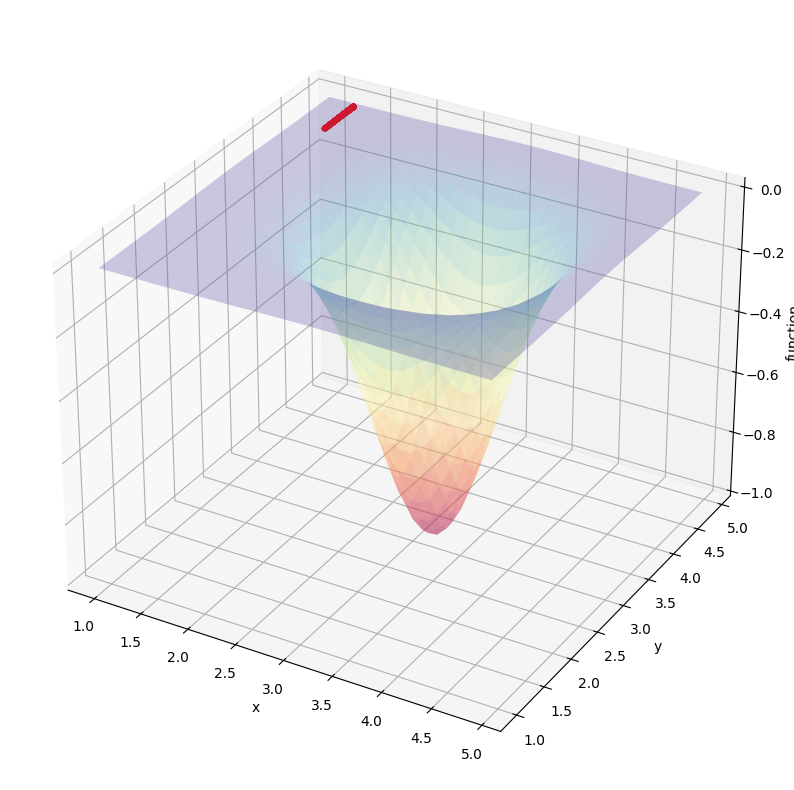

In [138]:
plot(
    x_range=np.arange(1, 5, 0.1),
    y_range=np.arange(1, 5, 0.1),
    function=easom,
    path=path,
)

At the end, it looks like the `easom` function is too flat around the global minimum, so the algorithm
makes too much steps in the wrong direction. If we want to find the global minimum, we should start
the algorithm near the global minimum to get this to work. Otherwise, the algorithm will diverge.

I think a workaround to be able to find the global minimun of this fashion could be spaming random
starting points and then choose the one that converges to the minimun point.
